In [1]:
import os
from pathlib import Path, PureWindowsPath
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
path = "/Users/williamearley/Quarter 5/Capstone/Data"

In [3]:
df_train = pd.read_csv(os.path.join(path, 'train.csv'))
df_transaction = pd.read_csv(os.path.join(path, 'transactions.csv'))
df_holidays = pd.read_csv(os.path.join(path, 'holidays_events.csv'))
df_oil = pd.read_csv(os.path.join(path, 'oil.csv'))
df_stores = pd.read_csv(os.path.join(path, 'stores.csv'))
df_test = pd.read_csv(os.path.join(path, 'test.csv'))

## General Exploration

In [4]:
df_train.head(3)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


In [5]:
df_transaction.head(3)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


In [6]:
df_test.head(3)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2


In [7]:
df_train['date'].max()

'2017-08-15'

In [8]:
df_test['date'].max()

'2017-08-31'

In [9]:
df_train['date'].min()

'2013-01-01'

In [10]:
df_test['date'].min()

'2017-08-16'

Looks like the train data spans from Jan 2013 to August 2017, whereas the test data only covers the last two weeks of August 2017.

In [11]:
df_train.shape

(3000888, 6)

In [12]:
df_test.shape

(28512, 5)

In [13]:
df_train.info

<bound method DataFrame.info of               id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000

In [14]:
# Converting all date columns to datetime

df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

### Let's see which categories are most represented in the train data.

In [15]:
cat_sales = df_train.groupby('family')['sales'].sum().reset_index()

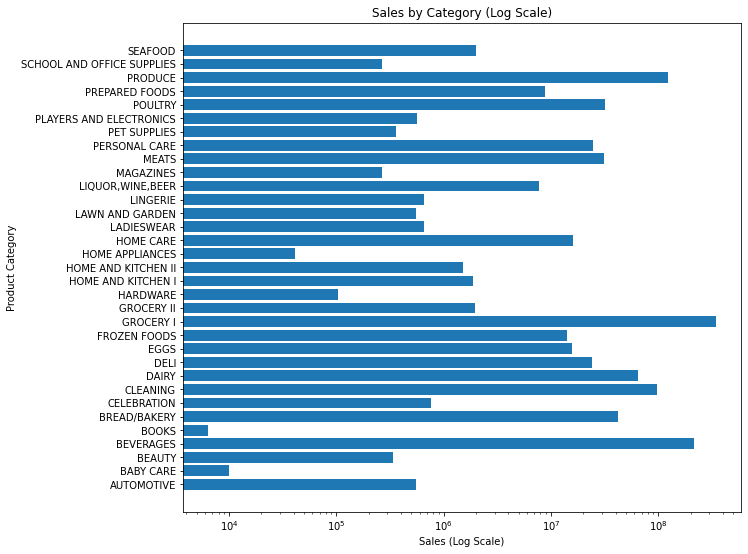

In [16]:
plt.figure(figsize=(10, 9))
plt.barh(cat_sales['family'], cat_sales['sales'])
plt.xscale('log')
plt.xlabel('Sales (Log Scale)')
plt.ylabel('Product Category')
plt.title('Sales by Category (Log Scale)')
plt.show()

## Grouping sales by month

In [19]:
df_train['date'] = pd.to_datetime(df_train['date'])

monthly_sales = df_train.groupby(df_train['date'].dt.to_period('M')).sum()

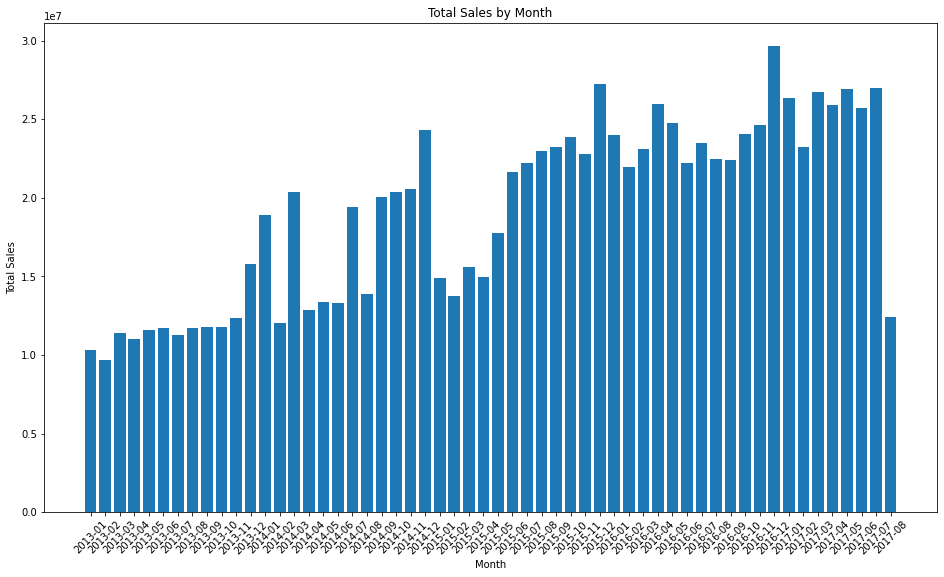

In [22]:
plt.figure(figsize=(16,9))
plt.bar(monthly_sales.index.astype(str), monthly_sales['sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.show()

In [23]:
monthly_sales_month = df_train.groupby(df_train['date'].dt.month).sum()

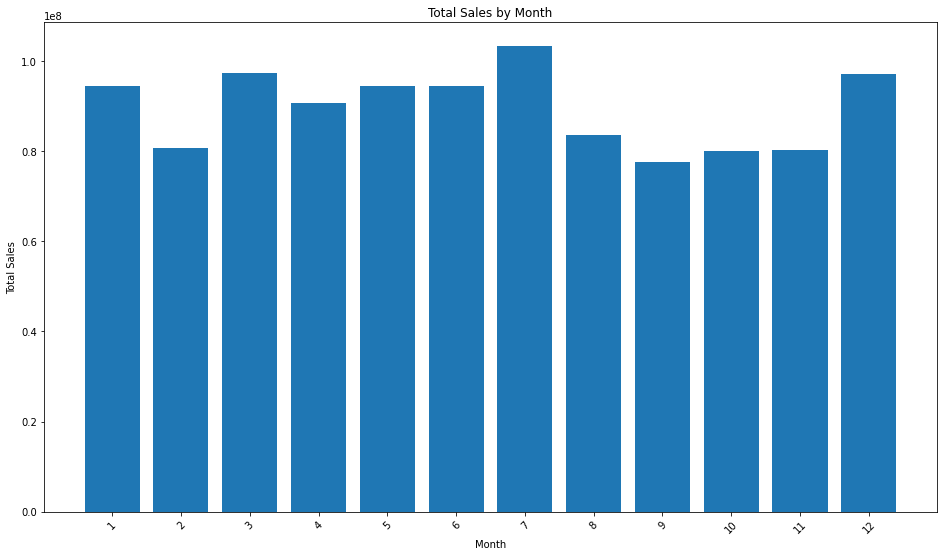

In [25]:
plt.figure(figsize=(16,9))
plt.bar(monthly_sales_month.index.astype(str), monthly_sales_month['sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.show()

## First pass of the SARIMA model

In [32]:
from pmdarima import auto_arima

In [37]:
# Converting the data column to a numeric value so it can work with SARIMA

df_train['date_numeric'] = df_train['date'].astype(int)  # Convert timestamp to numeric
df_train.set_index('date_numeric', inplace=True)

In [39]:
df_train.head(3)

,id,date,store_nbr,family,sales,onpromotion
date_numeric,,,,,,
1356998400000000000,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1356998400000000000,1,2013-01-01,1,BABY CARE,0.0,0
1356998400000000000,2,2013-01-01,1,BEAUTY,0.0,0


In [40]:
y = df_train['sales'].values

In [ ]:
model = auto_arima(y, m = 7)

## YouTube video on SARIMA, Catfish data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [46]:
#read data
catfish_sales = pd.read_csv('/Users/williamearley/Quarter 5/Capstone/Data/Practice/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


/var/folders/25/ys3kvvh94qz9hdnmxh9q884h0000gn/T/ipykernel_57551/2322171269.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  catfish_sales = pd.read_csv('/Users/williamearley/Quarter 5/Capstone/Data/Practice/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [40]:
path2 = "/Users/williamearley/Quarter 5/Capstone/Data/Practice"
catfish_sales = pd.read_csv(os.path.join(path2, 'catfish.csv'))

In [41]:
catfish_sales.head(5)

,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239


In [28]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [47]:
#infer the frequency of data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [48]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

In [37]:
end_date

datetime.datetime(2000, 1, 1, 0, 0)

In [49]:
catfish_sales.head(3)

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
Freq: MS, Name: Total, dtype: int64

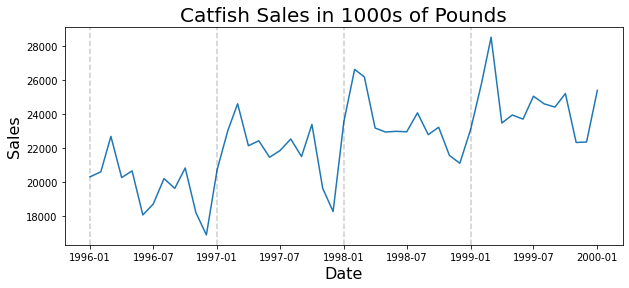

In [50]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Removing the trend

In [51]:
first_diff = lim_catfish_sales.diff()[1:]

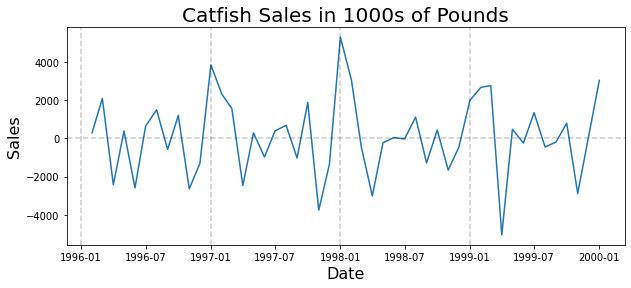

In [52]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)